In [161]:
from random import shuffle, randint,sample,choices, random 
import matplotlib.pyplot as plt
from typing import List

In [162]:

def create_solution(n:int)->List:
    """Generate a random permutation of size n that represents a solution."""
    sol : List =  list(range(n))
    shuffle(sol)
    return sol

def crossover(parent_1, parent_2):
    """Perform one-point crossover to create two offsprings."""
    n = len(parent_1)
    ref_point = randint(1, n-1)
    child_1 = parent_1[:ref_point] + [x for x in parent_2 if x not in parent_1[:ref_point]]
    child_2 = parent_2[:ref_point] + [x for x in parent_1 if x not in parent_2[:ref_point]]
    return child_1, child_2

def mutate(permutation) -> None:
    """Apply mutation to a permutation with a given mutation rate."""
    i, j = sample(range(len(permutation)), 2)
    permutation[i], permutation[j] = permutation[j], permutation[i]


In [163]:

def fitness(sol : List) -> int:
    """Calculate the fitness of a permutation (number of queen conflicts)."""
    conflicts = 0
    n = len(sol)
    for i in range(n):
        for j in range(i+1, n):
            if abs(i - j) == abs(sol[i] - sol[j]):
                conflicts += 1
    return conflicts

In [164]:
def metrics(best_solutions : List, worst_solutions : List)->None:
    """Plot the development of worst and best solutions per generation"""
    x = range(len(best_solutions))
    plt.plot(x, best_solutions, label='Best Solution')
    plt.plot(x, worst_solutions, label='Worst Solution')
    plt.xlabel('Generation')
    plt.ylabel('Fitness (Number of Conflicts)')
    plt.legend()
    plt.title('Genetic Algorithm for N-Queens')
    plt.show()

In [165]:

def genetic_algorithm(n: int, pop_size: int, mutation_rate: float, max_generations: int) -> List[int]:
    best_solutions : List = []  # To store the best solution per generation
    worst_solutions : List = []  # To store the worst solution per generation

    pop = [create_solution(n) for _ in range(pop_size)]

    for _ in range(max_generations):
        # Order population by fitness quality.
        pop = sorted(pop, key=lambda x: fitness(x))

        best_solution = pop[0]
        # Save historic data of best and worst solutions per generation.
        best_solutions.append(fitness(pop[0]))
        worst_solutions.append(fitness(pop[-1]))

        if fitness(best_solution) == 0:
            break
        new_pop : List = pop[:2]
        for _ in range(pop_size // 2):
            parent1, parent2 = choices(pop[:pop_size // 2], k=2)
            child1, child2 = crossover(parent1, parent2)
            mutate(child1)
            mutate(child2)
            new_pop.extend([child1, child2])
        pop = new_pop
    # Plot the best and worst solution per generation.
    metrics(best_solutions, worst_solutions)
    return best_solution  # Return the best solution found

In [166]:

def print_board(sol : List):
    n = len(sol)
    for row in range(n):
        line = ""
        for col in range(n):
            if sol[col] == row:
                line += "Q "
            else:
                line += ". "
        print(line)


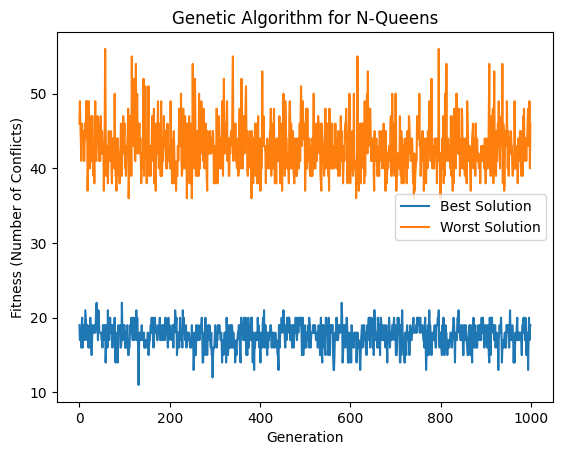

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q

In [167]:

n = 50  # Change this to the desired board size
population_size = 100
mutation_rate = 0.1
max_generations = 1000

best_solution = genetic_algorithm(n, population_size, mutation_rate, max_generations)
print_board(best_solution)
# Print the best solution found
print("Best solution:", best_solution)
